# 1 Matrix operations
## 1.1 Create a 4*4 identity matrix

In [1]:
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO create a 4*4 identity matrix 
I = [[1, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 1]]

## 1.2 get the width and height of a matrix. 

In [2]:
#TODO Get the width and height of a matrix.
def shape(M):
    if hasattr(M[0], "__len__"):
        return len(M), len(M[0])
    else:
        return 1, len(M)

## 1.3 round all elements in M to certain decimal points
in-place operation, no return value

In [3]:
#TODO round all elements in M to decPts
def matxRound(M, decPts=4):
    r, c = shape(M)
    if r != 1:
        for i in range(r): 
            for j in range(c):
                M[i][j] = round(float(M[i][j]), decPts)
    else:
        for j in range(c):
            M[j] = round(float(M[j]), decPts)

## 1.4 compute transpose of M

In [4]:
#TODO compute transpose of M
def transpose(M):
    if hasattr(M[0], "__len__"):
        return list(map(list, zip(*M)))
    else:
        return [[m] for m in M]
    # 2d only

## 1.5 compute AB. return None if the dimensions don't match

In [5]:
#TODO compute AB, return None if the dimensions don't match
def dotMultiply(A, B):
    rA, cA = shape(A)
    rB, cB = shape(B)
    mat = []
    if cA != rB:
        return None
    else:
        BT = transpose(B)
        for i in range(rA):
            row = []
            for j in range(cB):
                row.append(sum([a*b for (a, b) in zip(A[i], BT[j])]))
            mat.append(row)
        return mat

## 1.6 Test your implementation

In [7]:
def matPrint(M):
    for row in M:
        print(row)
#TODO test the shape function
print("shape of B:", shape(B), "\n")
#TODO test the round function
matxRound(B)
matPrint(B)
print()
#TODO test the transpose funtion
matPrint(transpose(B))
print()
#TODO test the dotMultiply function
matPrint(dotMultiply(B, I))

shape of B: (3, 4) 

[1.0, 2.0, 3.0, 5.0]
[2.0, 3.0, 3.0, 5.0]
[1.0, 2.0, 5.0, 1.0]

[1.0, 2.0, 1.0]
[2.0, 3.0, 2.0]
[3.0, 3.0, 5.0]
[5.0, 5.0, 1.0]

[1.0, 2.0, 3.0, 5.0]
[2.0, 3.0, 3.0, 5.0]
[1.0, 2.0, 5.0, 1.0]


# 2 Gaussign Jordan Elimination

## 2.1 Compute augmented Matrix 

In [8]:
#TODO augment matrix of matrix A and column vector b, assume A and b are comfortable
import copy
def augmentMatrix(A, b):
    result = copy.deepcopy(A)
    for (a, b_elem) in zip(result, b):
        a.append(b_elem)
    return result

## 2.2 Basic row operations
1. exchange two rows
2. scale a row
3. add a scaled row to another

in-place operation, no return value

In [9]:
#TODO r1 <---> r2
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

#TODO r1 <--- r1 * scale
def scaleRow(M, r, scale):
    M[r] = [e_r*scale for e_r in M[r]]

#TODO r1 <--- r1 + r2*scale
def addScaledRow(M, r1, r2, scale):
    M[r1] = [e_r1 + e_r2*scale for (e_r1, e_r2) in zip(M[r1], M[r2])]

## 2.3  Gauss-jordan method to solve Ax = b

### 这应该叫列主元素消去法, 高斯约当消去法是一种 $[A|I]$ --> $[I|A^{-1}]$的方法,有一点不一样

Pseudo code

```
def gj_solve(A, b)
    test if A and b have same height
    Ab = augmentMatrix(A, b) 
    for every column c of A:
        r = argmax(Ab[c..N, c])
        if Ab[r, c] == 0, A is singular
        swapRow(Ab, r, c)
        scaleRow(Ab, c, 1/Ab[c,c])
        for all row r other than c:
            addScaledRow(Ab, r, c, -Ab[r][c])
    return Ab[:, -1]
```

Make use of augmented matrix and row operations

In [10]:
#TODO implement gaussian jordan method to solve Ax = b

""" Gauss-jordan method to solve x such that Ax = b.
        A: square matrix, list of lists
        b: column vector, list of lists
        decPts: degree of rounding, default value 4
        epsilon: threshold for zero, default value 1.0e-16
        
    return x such that Ax = b, list of lists 
    return None if A and b have same height
    return None if A is (almost) singular
"""
def argmax_col(X, i):
    col_i = [x[i] for x in X[i:]]
    return col_i.index(max(col_i)) + i


def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
 
    #test if A and b have same height
    nb_row, nb_col = shape(A)
    if nb_row != len(b):
        print("not match")
        return None
    #make augment matrix Ab 
    Ab = augmentMatrix(A, b)
    
    #for every column of A
    for col in range(nb_col):
        #In column col under the diagnal, 
        #find index of the element with largest absolute value  
        max_idx = argmax_col(Ab, col)
        if abs(Ab[max_idx][col]) < epsilon:
            return None
        #In column col under the diagnal, 
        #if the largest absolute value is zero (aka smaller than epsilon), 
        #then the matrix is singular
        #P2.4 Prove the above proposition 
        
        #swap rows to get largest absolute value element on the diagonal
        swapRows(Ab, col, max_idx)
        #scale the row to make Ab[col][col] equals to 1
        scaleRow(Ab, col, 1/Ab[col][col])
        #eliminate(make them zero) everything else in column col. 
        for row in range(nb_row):
            if row != col:
                addScaledRow(Ab, row, col, -Ab[row][col]/Ab[col][col])
    #return the last column 
    sol = [r[-1] for r in Ab]
    matxRound(sol)
    return sol

## 2.4 Prove the following proposition:

**If square matrix A can be divided into four parts: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} $

**where I is the identity matrix, Z is all zero and the first column of Y is all zero, then A is singular.**

Hint: There are mutiple ways to prove this problem.  
- consider the rank of Y and A
- consider the determinate of Y and A 
- consider certain column is the linear combination of other columns

TODO Proof: 
> Since,   
  $ |Y| = 0 $ and $Z$ is all zero  
  
  
> Hence,   
   $|A| = |I||Y| = 0 $ 
   
   
> Which gives that $A$ is singular

## 2.5 Test your gj_Solve() implementation

In [11]:
# construct A and b where A is singular
A = [[1, 2, 1],
     [2, 4, 2],
     [3, 2, 1]]
b = [3, 4, 5]
# construct A and b where A is not singular
x = gj_Solve(A, b)

print(x)


A = [[1, 2, 3, 8],
     [3, 2, 1, 2],
     [5, 2, 1, 3],
     [2, 6, 2, 1]]
b = [3, 4, 5, 6]
# solve x for  Ax = b

x = gj_Solve(A, b)

print(x)
# compute Ax
# compare Ax and b
print(shape(A))
print(shape(x))
bb = dotMultiply(A, transpose(x))
print(bb)
# TODO

None
[1.125, -0.625, 4.375, -1.25]
(4, 4)
(1, 4)
[[3.0], [4.0], [5.0], [6.0]]


# 3 Linear Regression: 

## 3.1 Compute loss function

We define loss funtion E as 
$$
E = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

Proves that 
$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$ 


$$ 
\text{,where }
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO Proof: 
> take a exploded form of E
$$ E = \sum_{i=1}^{n}{y_i^2} - \sum_{i=1}^{n}2(mx_i+b)y_i + \sum_{i=1}^n(mx_i + b)^2$$
> notice that
$$ mx_i + b = X_i \cdot h $$
> therefore
$$ E = Y^TY - 2(Xh)^TY + (Xh)^TXh $$ 

## 3.2 Compute the gradient of loss function with respect to parameters 

Proves that

$$
\frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

TODO Proof:
> 1. $$ \frac{\partial E}{\partial m} = \sum_{i=1}^n2x_i(mx_i+b) -\sum_{i=1}^n2x_iy_i $$
> 2. $$ \frac{\partial E}{\partial b} = \sum_{i=1}^n2(mx_i+b) -\sum_{i=1}^n2y_i $$
> hence 
$$
\frac{\partial E}{\partial h} = \begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} \\
\end{bmatrix} = 2X^TXh - 2X^TY
$$

## 3.3  Compute linear regression by solving linear equation gradient = 0 

In [12]:
#TODO implement linear regression 
'''
compute linear regression 
points: list of (x,y) tuple
return m and b
'''
def linearRegression(points):
    X = [[p[0], 1] for p in points]
    y = [p[1] for p in points]
    A = dotMultiply(transpose(X), X)
    b = [dp[0] for dp in dotMultiply(transpose(X), transpose(y))]
    h = gj_Solve(A, b)
    return h[0], h[1]

## 3.4 Test your linear regression implementation

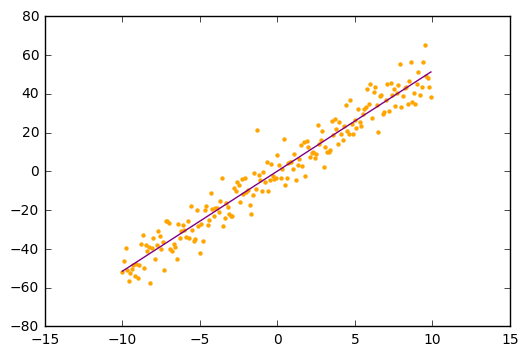

In [13]:
#TODO Construct the linear function
import random
import matplotlib.pyplot as plt
X = [x*0.1 for x in range(-100, 100)]
m = 5
b = 0.3
y = [m*x+b+random.gauss(0, 7) for x in X]
plt.scatter(X, y, s = 10, linewidths=0, color = 'orange')

#TODO Construct points with gaussian noise
points = list(zip(X, y))

#TODO Compute m and b and compare with ground truth
mm, bb = linearRegression(points)

plt.plot(X, [mm*x+bb for x in X], color = 'purple')
plt.show()